In [1]:
import tensorflow as tf
!pip install --upgrade torch torchviz
import torch
import torch.nn as nn

batch_size = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device", device)

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.5.1+cu101)
     |████████████████████████████████| 51kB 2.5MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3523 sha256=e8e562a46f9d4c80f2adc20b44e71056a1a2f9eff40881c4860d47277a7cdd61
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz
device cuda


In [2]:
!nvidia-smi

Fri Jul  3 08:08:24 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    31W / 149W |     11MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

11493376/11490434 [==============================] - 0s 0us/step
(60000, 1, 28, 28)
[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.  

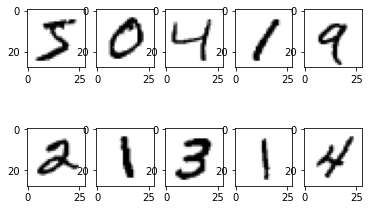

In [3]:


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 1, 28, 28).astype('float32')
x_test = x_test.reshape(10000, 1, 28, 28).astype('float32')

x_train /= 255
x_test /= 255
y_train = y_train.astype('long')
y_test = y_test.astype('long')
print(x_train.shape)
import matplotlib.pyplot as plt
print(x_train[1])
fig = plt.figure()
for i in range(10):
  a = fig.add_subplot(2,5,i+1)
  a.imshow(x_train[i].reshape(28,28),cmap='gray_r')


In [4]:
from torch.utils.data import TensorDataset, DataLoader

tx_train = torch.from_numpy(x_train).float()
ty_train = torch.from_numpy(y_train).float()
tx_test = torch.from_numpy(x_test).float()
ty_test = torch.from_numpy(y_test).float()

dataset_train = TensorDataset(tx_train, tx_train)
dataset_test = TensorDataset(tx_test, tx_test)


loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
loader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=True)



In [60]:
activation = torch.nn.ReLU()
activation2 = torch.nn.Sigmoid()
function = torch.nn.functional



class CAE(nn.Module):
  def __init__(self):
    super(CAE, self).__init__()
    self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
    self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
    self.conv3 = nn.ConvTranspose2d(32, 16, 2, 2)
    self.conv4 = nn.ConvTranspose2d(16, 1, 2, 2)
    
  def forward(self, x):
    x = activation(self.conv1(x))
    x = function.max_pool2d(x, (2, 2))
    x = activation(self.conv2(x))
    x = function.max_pool2d(x, (2, 2))
    encoded = x
    x = activation(self.conv3(x))
    x = activation2(self.conv4(x))
    return x, encoded

model = CAE().to(device)
model


CAE(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): ConvTranspose2d(32, 16, kernel_size=(2, 2), stride=(2, 2))
  (conv4): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
)

torch.Size([1, 32, 7, 7])
torch.Size([1, 1, 28, 28])


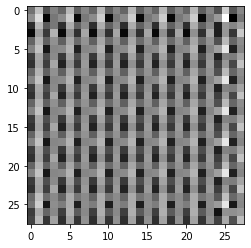

In [61]:
import matplotlib.pyplot as plt

xx = torch.ones((1,1, 28, 28))
xx = xx.cuda()
yy, ee = model(xx)
device2 = torch.device('cpu')
xx = xx.to(device2)
yy = yy.to(device2)
print(ee.shape)

xx2 = xx.detach().clone().numpy()
yy2 = yy.detach().clone().numpy()

plt.imshow(xx2.reshape(28,28), cmap='gray_r')
plt.imshow(yy2.reshape(28,28), cmap='gray_r')
print(yy.shape)

(1, 32, 7, 7)


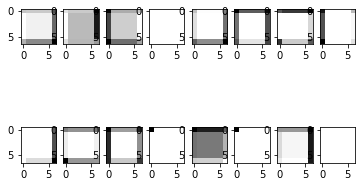

In [62]:
ee = ee.to(device2)
ee2 = ee.detach().clone().numpy()
print(ee2.shape)
figg = plt.figure()
for i in range(16):
  a = figg.add_subplot(2,8,i+1)
  a.imshow(ee2[0][i].reshape(7,7),cmap='gray_r')

(10, 1, 28, 28)
                      
output


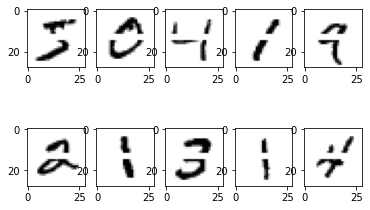

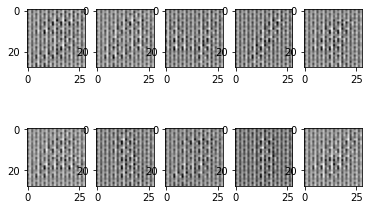

In [63]:
xx = tx_train[0:10]
zeros = torch.zeros((28,))
xx = xx.reshape(10,1,28,28)
for i in range(10):
  xx[i][0][12] = zeros
  xx[i][0][13] = zeros
  xx[i][0][14] = zeros

xx = xx.to(device)
yy, ee = model(xx)
xx = xx.to(device2)
yy = yy.to(device2)
xx2 = xx.detach().clone().numpy()
yy2 = yy.detach().clone().numpy()
print(yy2.shape)
fig = plt.figure()
for i in range(10):
  a = fig.add_subplot(2,5,i+1)
  a.imshow(xx2[i].reshape(28,28),cmap='gray_r')
print("                      ")
print("output")
fig2 = plt.figure()  
for i in range(10):
  a = fig2.add_subplot(2,5,i+1)
  a.imshow(yy2[i].reshape(28,28),cmap='gray_r')

In [64]:
import torch.optim as optim

lr = 0.0005
momentum = 0
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()

In [65]:
%matplotlib inline

global_step = 0

def train(epoch):
  model.train()
  steps = len(loader_train)//batch_size
  for step, (x, y) in enumerate(loader_train, 1):
    global global_step
    global_step += 1
    
    x, y = x.to(device), y.to(device)

    optimizer.zero_grad()
    outputs, encoded = model(x)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    if step % 100 == 0:
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' % (epoch, epochs, step, steps, loss.item()))
            loss_history.append(loss.item())
global_step1 = 0

in1 = []
out1 = []
m = 0
def eval(epoch):
  model.eval()
  total = 0
  with torch.no_grad():
    for (x, y) in loader_test:
      global global_step1
      global_step1 += 1
      x, y = x.to(device), y.to(device)

      outputs, encoded = model(x)
      loss = criterion(outputs, y)
      
      if global_step1 % 100 == 0:
        print(type(outputs))
        print(outputs.shape)
        print(x.shape)
        device2 = torch.device('cpu')
        x = x.to(device2)
        outputs = outputs.to(device2)
        x2 = x.detach().clone().numpy()
        outputs2 = outputs.detach().clone().numpy()
        plt.imshow(x2[1].reshape(28,28), cmap='gray_r')
        plt.imshow(outputs2[1].reshape(28,28), cmap='gray_r')

        #for i in range(10):
          #fig = plt.figure()
          #a = fig.add_subplot(2,5,i+1)
          #a.imshow(x2[i].reshape(28,28),cmap='gray_r')
          #a.imshow(outputs2[i].reshape(28,28),cmap='gray_r')
        loss_history_test.append(loss)
        print("Test_Loss : %.4f" % (loss))

Epoch [1/10], Step [100/6], Loss: 0.0652
Epoch [1/10], Step [200/6], Loss: 0.0205
Epoch [1/10], Step [300/6], Loss: 0.0149
Epoch [1/10], Step [400/6], Loss: 0.0111
Epoch [1/10], Step [500/6], Loss: 0.0095
Epoch [1/10], Step [600/6], Loss: 0.0082
<class 'torch.Tensor'>
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
Test_Loss : 0.0080
Epoch [2/10], Step [100/6], Loss: 0.0073
Epoch [2/10], Step [200/6], Loss: 0.0065
Epoch [2/10], Step [300/6], Loss: 0.0058
Epoch [2/10], Step [400/6], Loss: 0.0058
Epoch [2/10], Step [500/6], Loss: 0.0050
Epoch [2/10], Step [600/6], Loss: 0.0052
<class 'torch.Tensor'>
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
Test_Loss : 0.0049
Epoch [3/10], Step [100/6], Loss: 0.0054
Epoch [3/10], Step [200/6], Loss: 0.0046
Epoch [3/10], Step [300/6], Loss: 0.0051
Epoch [3/10], Step [400/6], Loss: 0.0048
Epoch [3/10], Step [500/6], Loss: 0.0046
Epoch [3/10], Step [600/6], Loss: 0.0045
<class 'torch.Tensor'>
torch.Size([100, 1, 28, 28])
torch.Size

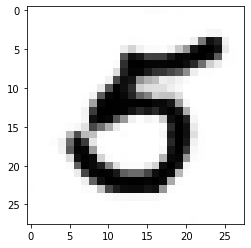

In [66]:
def _initialize_weights(self):
  for m in self.modules():
    if isinstance(m, nn.Conv2d, nn.ConvTranspose2d):
      init.xavier_uniform_(m.weight.data, gain=init.calculate_gain('relu'))


epochs = 10
loss_history = []
loss_history_test = []
for epoch in range(1, epochs+1):
  train(epoch)
  eval(epoch)

(10, 1, 28, 28)
                      
output


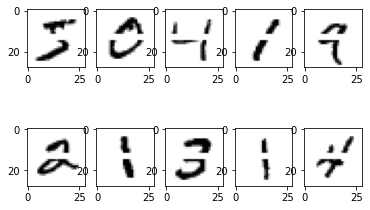

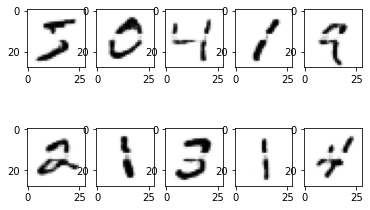

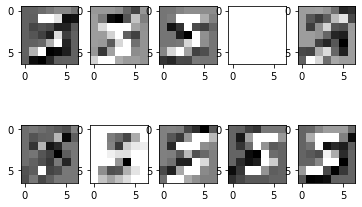

In [67]:
xx = tx_train[0:10]
zeros = torch.zeros((28,))
xx = xx.reshape(10,1,28,28)


xx = xx.to(device)
yy, encoded = model(xx)
xx = xx.to(device2)
yy = yy.to(device2)
encoded = encoded.to(device2)
xx2 = xx.detach().clone().numpy()
yy2 = yy.detach().clone().numpy()
en2 = encoded.detach().clone().numpy()
print(yy2.shape)
fig = plt.figure()
for i in range(10):
  a = fig.add_subplot(2,5,i+1)
  a.imshow(xx2[i].reshape(28,28),cmap='gray_r')
print("                      ")
print("output")
fig2 = plt.figure()  
for i in range(10):
  a = fig2.add_subplot(2,5,i+1)
  a.imshow(yy2[i].reshape(28,28),cmap='gray_r')

fig3 = plt.figure()  
for i in range(10):
  a = fig3.add_subplot(2,5,i+1)
  a.imshow(en2[0][i].reshape(7,7),cmap='gray_r')




Fri Jul  3 08:20:31 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    75W / 149W |    367MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

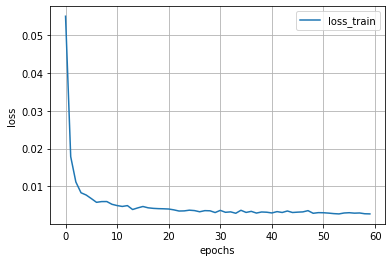

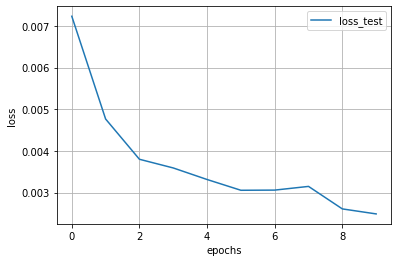

In [58]:
!nvidia-smi

plt.plot(loss_history, label='loss_train', marker='None')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(loss_history_test, label='loss_test', marker='None')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
import torch.nn.init as init

def _initialize_weights(self):
  for m in self.modules():
    if isinstance(m, nn.Conv2d):
      init.xavier_uniform_(m.weight.data, gain=init.calculate_gain('relu'))

train_history = []
test_history = []


for epoch in range(EPOCHS):
  loss = 0.0
  loss_test = 0.0
  total_loss = 0.0
  total_loss_test = 0.0
  av_loss = 0.0
  av_loss_test = 0.0

  for train_x, train_y in loader_train:
    loss = train(train_x=train_x, train_y=train_y)
    total_loss += loss
  av_loss = total_loss/100
  train_history.append(av_loss)
  for test_x, test_y in loader_test:
    loss_test = test(test_x=test_x, test_y=test_y)
    total_loss_test += av_loss_test
  av_loss_test = total_loss_test/100
  test_history.append(av_loss_test)
  print('Epoch  [%d/%d], Av_Loss  :  %.4f,  Av_Loss_Test  :  %4f' % (epoch, EPOCHS, av_loss, av_loss_test))


TypeError: ignored

In [ ]:
function.up

1